In [4]:
import cProfile

In [ ]:
import sys, random, math

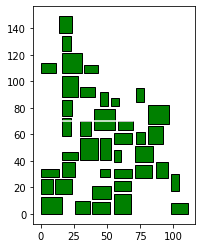

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     4.90000       7308.00     9.00%     0.00%     0:01:33    -1:59:33 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     4.90000       7917.00    10.00%     0.00%     0:00:08     0:00:00

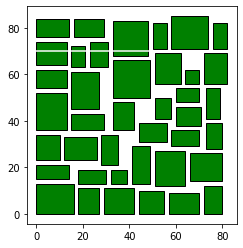

In [1]:
from __future__ import print_function
import math
import main
import random
from collections import defaultdict
from simanneal import Annealer
from itertools import permutations

class TravellingSalesmanProblem(Annealer):
    # pass extra data (the distance matrix) into the constructor
    def __init__(self,state,pseq1,w,h):
        self.pseq1=pseq1
        self.h=h
        self.w=w
        self.state=state
        super(TravellingSalesmanProblem, self).__init__(state)  # important!

    def move(self):
        initial_energy = self.energy()
        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        if a!=b:
            self.state[a], self.state[b] = self.state[b], self.state[a]
        return self.energy() - initial_energy
    def energy(self):
        """Calculates the length of the route."""
        e,x,y= main.toArea(self.state,self.pseq1,self.w,self.h)
        return e

nm=40
p= [[i for i in range(1,nm+1)],[i for i in range(1,nm+1)]]
random.shuffle(p[0])
random.shuffle(p[1])

pseq=[p[0],p[1]]
w=[]
h=[]
#w=[10,20,15,10,20]
#h=[20,15,10,5,20]
for i in range(nm):
    w.append(random.randint(5,15)+3)
    h.append(random.randint(5,15)+3)

#w=[10,20,15,10,20,15,10,5,]
#h=[20,15,10,5,20,10,5,10]
state=pseq[0]
pseq1=pseq[1]


area, x, y = main.toArea(state,pseq1,w,h)

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

ax.plot([0,70],[70,70],color='white')
#color = ['green', 'blue', 'orange', 'red', 'yellow','brown', 'gray','cyan','pink', 'purple']
#add rectangle to plot
count = 0
for i in range(1,len(w)+1):
    ax.add_patch(Rectangle((x[count],y[count]), w[count]-2, h[count]-2, facecolor='green', edgecolor='black'))
    count +=1
#display plot
plt.axis("scaled")
plt.show()
tsp = TravellingSalesmanProblem(state,pseq1, w,h)
tsp.set_schedule(tsp.auto(minutes=0.2))
# since our state is just a list, slice is the fastest way to copy
tsp.copy_strategy = "slice"
state, e = tsp.anneal()

pseq1 = tsp.pseq1
area, x, y = main.toArea(state,pseq1,w,h)
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

ax.plot([0,70],[70,70],color='white')
#color = ['green', 'blue', 'orange', 'red', 'yellow','brown', 'gray','cyan','pink', 'purple']
#add rectangle to plot
count = 0
for i in range(1,len(w)+1):
    ax.add_patch(Rectangle((x[count],y[count]), w[count]-2, h[count]-2, facecolor='green', edgecolor='black'))
    count +=1
#display plot
plt.axis("scaled")
plt.show()

#### pseq1 = tsp.pseq1
area, x, y = main.toArea(state,pseq1,w,h)
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

ax.plot([0,20],[20,20],color='white')
color = ['green', 'blue', 'orange', 'red', 'yellow','brown', 'gray','cyan','pink', 'purple']
#add rectangle to plot
count = 0
for i in color:
    ax.add_patch(Rectangle((x[count],y[count]), w[count], h[count], facecolor=i, edgecolor='black'))
    count +=1
#display plot
plt.axis("scaled")
plt.show()

In [2]:
print(w,h)

[16, 15, 11, 16, 15, 13, 11, 9, 8, 12, 14, 10, 12, 8, 8, 9, 16, 9, 16, 13, 14, 18, 15, 16, 8, 15, 18, 9, 13, 15, 17, 10, 15, 10, 12, 14, 18, 14, 8, 15] [8, 10, 14, 9, 13, 10, 13, 13, 13, 13, 18, 14, 8, 13, 15, 15, 10, 11, 12, 12, 9, 18, 11, 14, 11, 10, 15, 8, 15, 17, 17, 13, 12, 18, 15, 8, 16, 10, 8, 18]


In [34]:
print(x,y)

[78, 70, 37, 38, 30, 27, 69, 74, 10, 45, 0, 56, 30, 0, 45, 10, 0, 0, 30, 58, 54, 0, 44, 38, 30, 56, 13, 55, 69, 15, 71, 58, 13, 54, 54, 28, 74, 0, 0, 71] [77, 48, 20, 63, 53, 18, 67, 37, 0, 37, 71, 11, 63, 38, 45, 14, 53, 79, 40, 48, 67, 25, 0, 76, 31, 0, 58, 76, 77, 25, 17, 37, 41, 20, 56, 0, 0, 0, 13, 27]


In [13]:
x,y=[0, 20, 0, 30, 10, 30, 0, 15],[15, 0, 5, 25, 15, 15, 0, 0]

w,h=[10, 20, 15, 10, 20, 15, 10, 5], [20, 15, 10, 5, 20, 10, 5, 10]


In [37]:
j=[]
count=0
for i in h:
    j.append(y[count]+h[count]+6)
    count+=1
max(j)

95

In [15]:
max(j)

51

In [8]:
import sys, random, math

In [9]:
class Spot:
    def __init__(self, i, j):
        self.x, self.y = i, j
        self.f, self.g, self.h = 0, 0, 0
        self.neighbors = []
        self.prev = None
        self.wall = False

    def add_neighbors(self, grid):
        if self.x < cols - 1:
            self.neighbors.append(grid[self.x+1][self.y])
        if self.x > 0:
            self.neighbors.append(grid[self.x-1][self.y])
        if self.y < rows - 1:
            self.neighbors.append(grid[self.x][self.y+1])
        if self.y > 0:
            self.neighbors.append(grid[self.x][self.y-1])

In [10]:
def heuristics(a, b):
    return math.sqrt((a.x - b.x)**2 + abs(a.y - b.y)**2)

In [11]:
def boxes(grid,x,y,w,h):
    newx=x+w-1
    newy=y+h-1
    grid[x][y].wall=True
    for i in range(1,w):
        grid[x+i][y].wall=True
    for i in range(1,h):
        grid[x][y+i].wall=True
    for i in range(1,w-1):
        grid[newx-i][newy].wall=True
    for i in range(1,h):
        grid[newx][y+i].wall=True


In [12]:
def astar(grid,cols, rows, openSet, closeSet, path, start, end):
    flag = False
    noflag = True
    startflag = False
    moregrid=False
    while True:
        startflag=True
        if startflag:
            if len(openSet) > 0:
                winner = 0
                for i in range(len(openSet)):
                    if openSet[i].f < openSet[winner].f:
                        winner = i

                current = openSet[winner]

                if current == end:
                    temp = current
                    while temp.prev:# prev is a parent
                        path.append(temp.prev)
                        temp = temp.prev
                    if not flag:
                        flag = True
                        print("Done")
                        path.append(end)
                    elif flag:
                        continue

                if flag == False:
                    openSet.remove(current)
                    closeSet.append(current)

                    for neighbor in current.neighbors:
                        if neighbor in closeSet or neighbor.wall:
                            continue
                        tempG = current.g + 1

                        newPath = False
                        if neighbor in openSet:
                            if tempG < neighbor.g:
                                neighbor.g = tempG
                                newPath = True
                        else:
                            neighbor.g = tempG
                            newPath = True
                            openSet.append(neighbor)

                        if newPath:
                            neighbor.h = heuristics(neighbor, end)
                            neighbor.f = neighbor.g + neighbor.h
                            neighbor.prev = current

            else:
                if noflag:
                    moregrid=True
                    print("Adding layers......this might take a while")



        if len(path)>0:
            #print('this is path',len(path))
            pathes.append(path)


        for i in range(cols):
            for j in range(rows):
                spot = grid[j][i]
                if spot in path:
                    spot.wall = True
        if flag:
            break
            
    return grid, moregrid


In [13]:
def fullgrid(grid,grids,conx_start,cony_start,conx_end, cony_end,counter, cols, rows):
    openSet = []

    for k in range(1,len(conx_start)+1):

        start=grid[conx_start[counter]][cony_start[counter]]
        start.wall = False
        end=grid[conx_end[counter]][cony_end[counter]]
        end.wall = False

        if len(openSet)>1:
            openSet = []
            closeSet = []
            path = []
        openSet=[]
        closeSet=[]
        path = []
        openSet.append(start)
        grid, moregrid=astar(grid,cols, rows, openSet, closeSet, path, start, end)
        grids.append(grid)
        if moregrid:
            break
        counter+=1
    if moregrid:
        size = (width, height) = 500, 500
        cols, rows = 100, 100

        grid = []
        openSet, closeSet = [], []
        path = []
        w = width//cols
        h = height//rows
        for i in range(cols):
            arr = []
            for j in range(rows):
                arr.append(Spot(i, j))
            grid.append(arr)

        for i in range(cols):
            for j in range(rows):
                grid[i][j].add_neighbors(grid)
        fullgrid(grid,grids,conx_start,cony_start,conx_end, cony_end,counter, cols, rows)

    return grids

In [17]:
size = (width, height) = 500, 500
cols, rows = 100, 100

grid = []
openSet, closeSet = [], []
path = []

w = width//cols
h = height//rows

for i in range(cols):
    arr = []
    for j in range(rows):
        arr.append(Spot(i, j))
    grid.append(arr)

for i in range(cols):
    for j in range(rows):
        grid[i][j].add_neighbors(grid)
pathes=[]
count = 0
width, hight = [12, 18, 17, 16, 14, 10, 15, 16, 18, 11, 13, 15, 8, 13, 13, 17, 8, 11, 15, 9, 12, 15, 12, 17, 15, 18, 17, 14, 9, 12, 14, 16, 17, 17, 16, 16, 16, 10, 8, 18],[10, 13, 11, 13, 10, 11, 10, 11, 14, 8, 8, 9, 17, 15, 9, 11, 18, 10, 13, 8, 9, 13, 17, 12, 9, 11, 18, 13, 12, 16, 10, 11, 17, 17, 11, 18, 17, 13, 8, 8]
#width = [10, 20, 15, 10, 20,15,10,5]
#hight = [20, 15, 10, 5, 20,10,5,10]
xcord,ycord=[78, 70, 37, 38, 30, 27, 69, 74, 10, 45, 0, 56, 30, 0, 45, 10, 0, 0, 30, 58, 54, 0, 44, 38, 30, 56, 13, 55, 69, 15, 71, 58, 13, 54, 54, 28, 74, 0, 0, 71],[77, 48, 20, 63, 53, 18, 67, 37, 0, 37, 71, 11, 63, 38, 45, 14, 53, 79, 40, 48, 67, 25, 0, 76, 31, 0, 58, 76, 77, 25, 17, 37, 41, 20, 56, 0, 0, 0, 13, 27]

#xcord = [0, 20, 0, 30, 10, 30, 0, 15]
#ycord = [15, 0, 5, 25, 15, 15, 0, 0]
conx_start=[96,96,96,96,96,96,98,98]
cony_start=[20,30,40,50,70,73,75,78]
conx_end=[4,4,4,4,4,4,4,4]
cony_end=[9,11,13,15,17,19,30,50]
for i in range(len(conx_start)):
    grid[conx_start[i]][cony_start[i]].wall = True
    grid[conx_end[i]][cony_end[i]].wall = True

for i in range(1,len(width)+1):
    boxes(grid,xcord[count]+10, ycord[count]+10, width[count]-3, hight[count]-3)
    count+=1
#for i in range(0,100):
#    grid[10][0+i].wall=True

grids=[]
counter=0
Newgrids = fullgrid(grid,grids,conx_start,cony_start,conx_end, cony_end,counter, cols, rows)

Done
Done
Done
Done
Done
Done
Done
Done


In [15]:
xpath=[]
ypath=[]
count = 0
for i in pathes:
    cordx=[]
    cordy=[]
    end = len(pathes[count])
    counter=1
    for j in i:
        if end==counter:
            break
        cordx.append(j.x)
        cordy.append(j.y)
        counter+=1
    xpath.append(cordx)
    ypath.append(cordy)
    count+=1

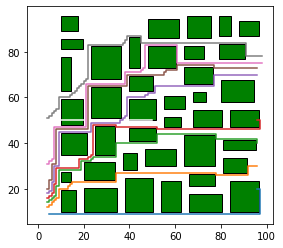

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
#x,y=[0, 20, 0, 30, 10, 30, 0, 15],[15, 0, 5, 25, 15, 15, 0, 0]

#w,h=[10, 20, 15, 10, 20, 15, 10, 5], [20, 15, 10, 5, 20, 10, 5, 10]


fig, ax = plt.subplots()

ax.plot([0,50],[50,50],color='white')
#color = ['green', 'blue', 'orange', 'red', 'yellow','brown', 'gray','cyan','pink', 'purple']
#add rectangle to plot
count = 0
for i in range(len(xpath)):
    plt.plot(xpath[i],ypath[i])

for i in range(1,len(width)+1):
    ax.add_patch(Rectangle((xcord[count]+10,ycord[count]+10), width[count]-3.5, hight[count]-3.5, facecolor='green', edgecolor='black'))
    count +=1
#display plot
plt.axis("scaled")
plt.show()